In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats 
import pylab
from sklearn.preprocessing import LabelEncoder, StandardScaler
#Model
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN

In [6]:
# Define the file path
mall_customer_path = '/Users/admin/Documents/Mall_Customers.csv'

# Read the CSV data into a Pandas DataFrame
mall_customers = pd.read_csv(mall_customer_path)

In [8]:
# Display the first few rows of the DataFrame
print(mall_customers.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [12]:
 mall_customers.shape

(200, 5)

In [13]:
mall_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
mall_customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [15]:
mall_customers.drop(["CustomerID"],axis=1,inplace=True)

In [16]:
mall_customers.rename(columns = {'Genre':'Gender'}, inplace = True)
 

In [17]:
mall_customers.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [18]:
mall_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


Text(0.5, 0, 'Gender')

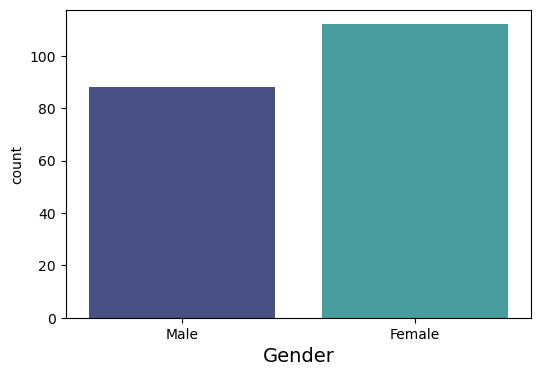

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Gender", data=mall_customers, palette="mako")
plt.xlabel("Gender", fontsize=14)

/var/folders/2j/nvmx9r313gq5c9b1ndl9hp200000gn/T/ipykernel_1213/331557665.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mall_customers["Annual Income (k$)"], kde=True, color="orange", bins=10)


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

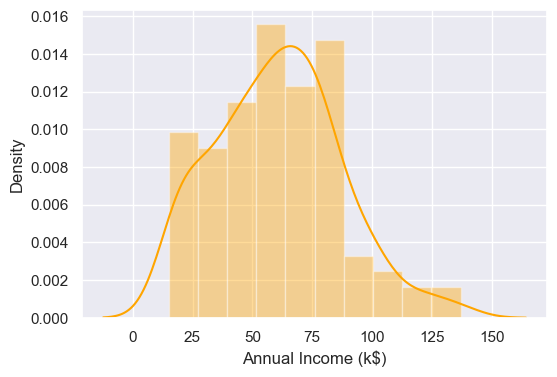

In [21]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(mall_customers["Annual Income (k$)"], kde=True, color="orange", bins=10)

/var/folders/2j/nvmx9r313gq5c9b1ndl9hp200000gn/T/ipykernel_1213/3143741673.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mall_customers["Age"], kde=True, color="orange", bins=10)


<Axes: xlabel='Age', ylabel='Density'>

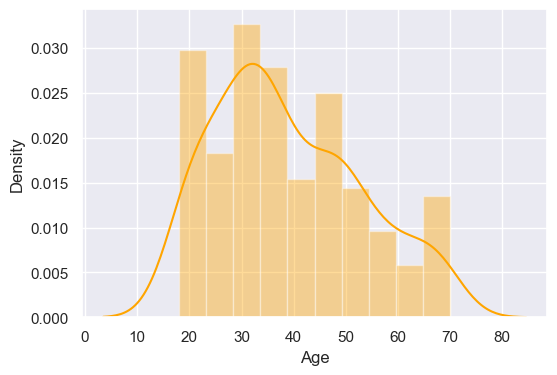

In [23]:
sns.set(rc={"figure.figsize": (6, 4)})
sns.distplot(mall_customers["Age"], kde=True, color="orange", bins=10)

/var/folders/2j/nvmx9r313gq5c9b1ndl9hp200000gn/T/ipykernel_1213/793423076.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mall_customers["Spending Score (1-100)"], kde=True, color="orange", bins=10)


<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

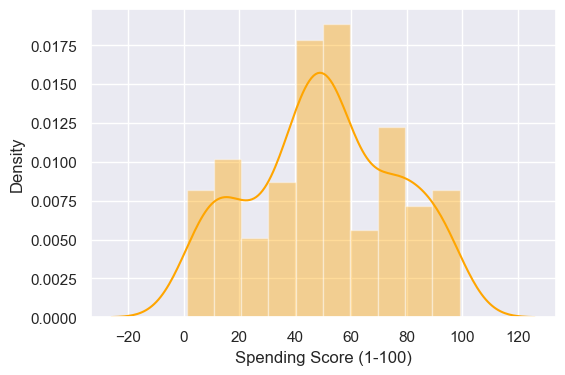

In [25]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(mall_customers["Spending Score (1-100)"], kde=True, color="orange", bins=10)

In [27]:
duplicated = mall_customers.duplicated()
print(duplicated.sum())

0


In [28]:
mall_customers.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

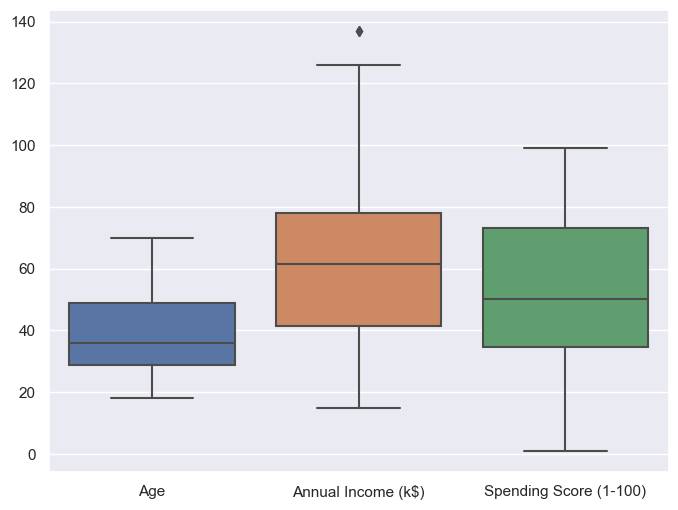

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=mall_customers)
plt.show()

In [34]:
def remove_outlier(col):
    sorted_col = sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range
        


In [36]:
lower_range, upper_range = remove_outlier(mall_customers["Annual Income (k$)"])
mall_customers["Annual Income (k$)"] = np.where(mall_customers["Annual Income (k$)"] > upper_range, upper_range, mall_customers["Annual Income (k$)"])
mall_customers["Annual Income (k$)"] = np.where(mall_customers["Annual Income (k$)"] < lower_range, lower_range, mall_customers["Annual Income (k$)"])


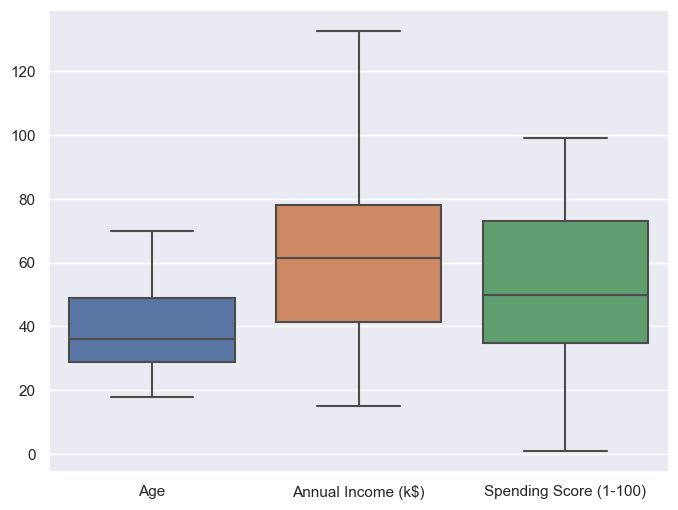

In [37]:
plt.figure(figsize=(8,6)) 
sns.boxplot(data=mall_customers) 
plt.show()

In [38]:
mall_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  200 non-null    object 
 1   Age                     200 non-null    int64  
 2   Annual Income (k$)      200 non-null    float64
 3   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 6.4+ KB


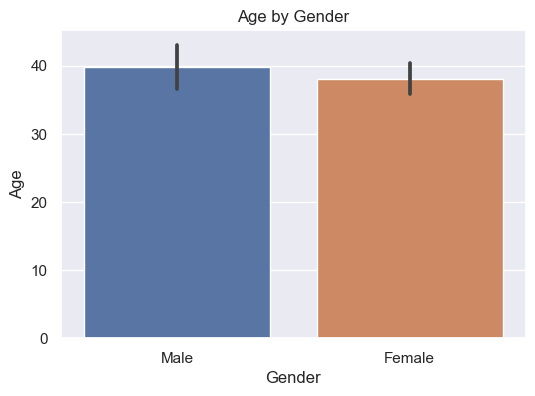

In [40]:
plt.figure(figsize=(6, 4)) 
sns.barplot(x='Gender', y='Age', data=mall_customers) 
plt.title('Age by Gender') 
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

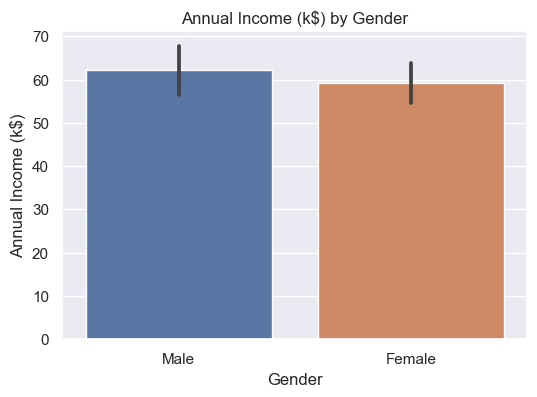

In [41]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Gender', y='Annual Income (k$)', data=mall_customers) 
plt.title('Annual Income (k$) by Gender') 
plt.xlabel('Gender')
plt.ylabel('Annual Income (k$)')
plt.show()

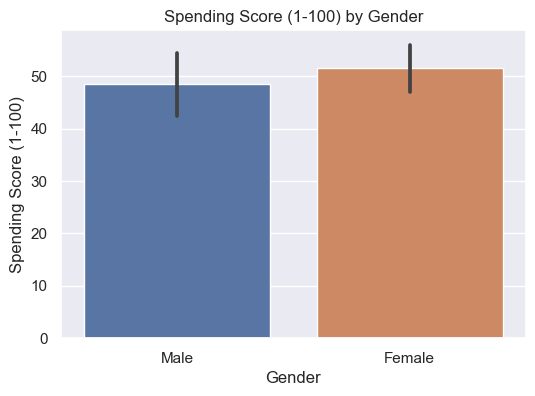

In [42]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Gender', y='Spending Score (1-100)', data=mall_customers) 
plt.title('Spending Score (1-100) by Gender') 
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.show()

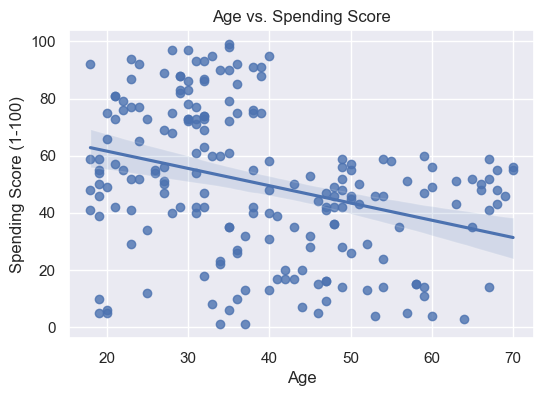

In [43]:
sns.regplot(x='Age', y='Spending Score (1-100)', data=mall_customers, color='b') 
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Age vs. Spending Score')
plt.show()

/var/folders/2j/nvmx9r313gq5c9b1ndl9hp200000gn/T/ipykernel_1213/3067501310.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


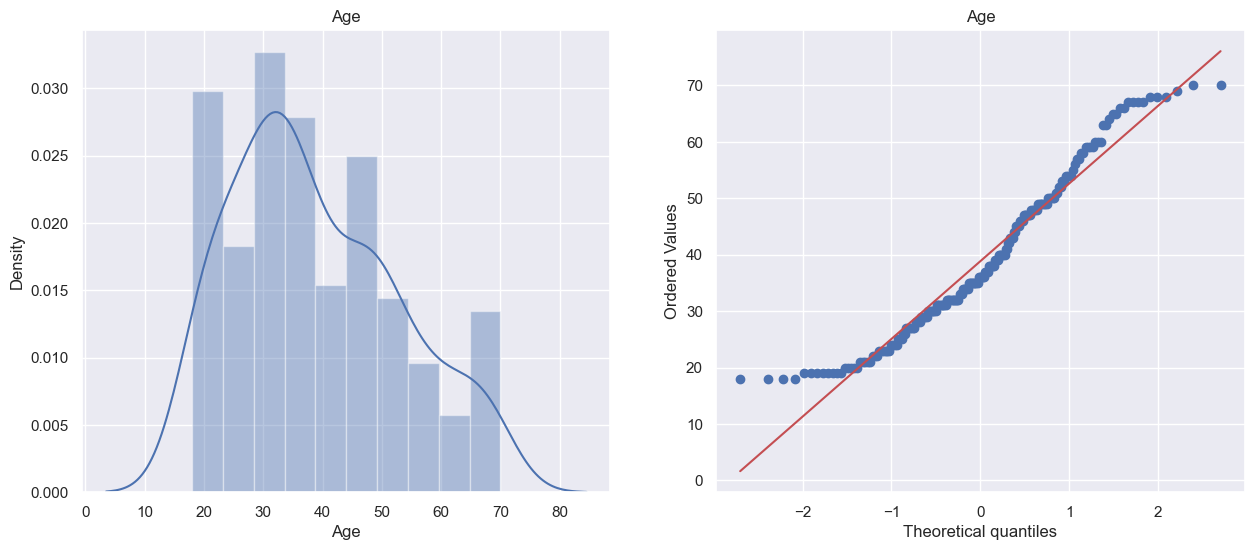

/var/folders/2j/nvmx9r313gq5c9b1ndl9hp200000gn/T/ipykernel_1213/3067501310.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


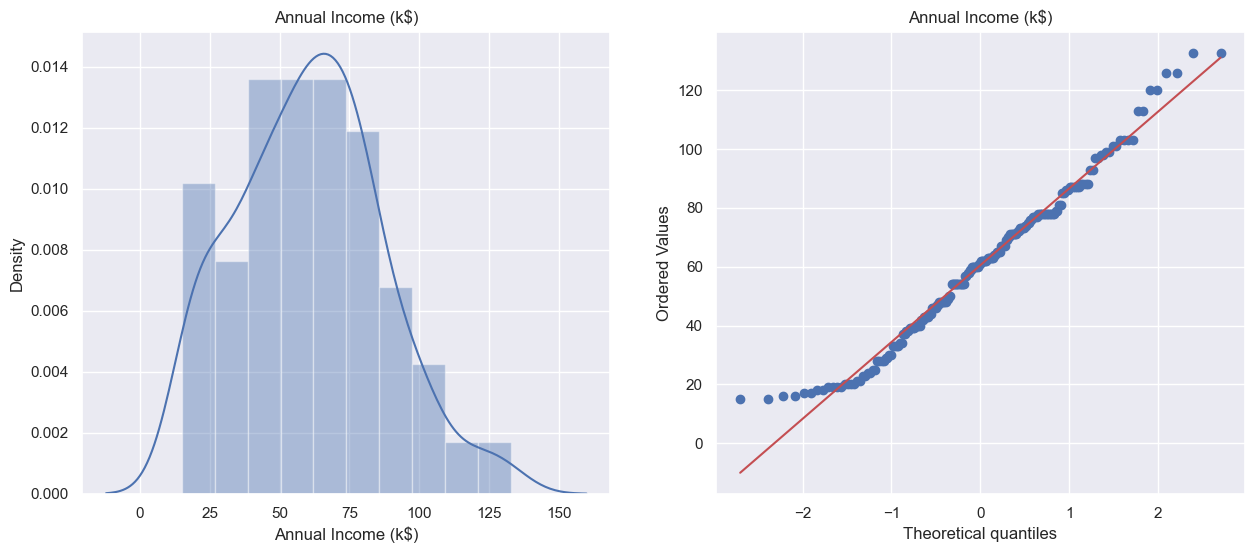

/var/folders/2j/nvmx9r313gq5c9b1ndl9hp200000gn/T/ipykernel_1213/3067501310.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


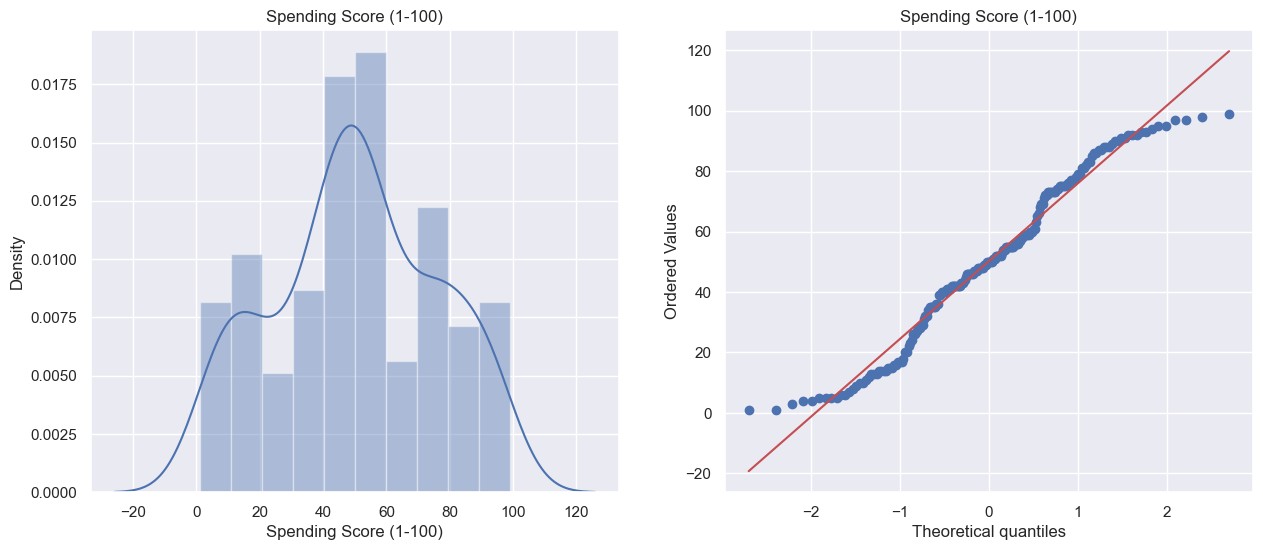

In [45]:
num_cols = mall_customers.select_dtypes(include=["int64","float64"]) 

def plots(num_cols, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    sns.distplot(num_cols[variable], kde=True, bins=10)
    plt.title(variable)
    plt.subplot(1, 2, 2)
    stats.probplot(num_cols[variable], dist="norm", plot=pylab)
    plt.title(variable)
    plt.show()

for i in num_cols.columns:
    plots(num_cols, i)

    


/var/folders/2j/nvmx9r313gq5c9b1ndl9hp200000gn/T/ipykernel_1213/823015096.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mall_customers.corr(), annot=True, cmap='coolwarm', ax=ax)


<Axes: >

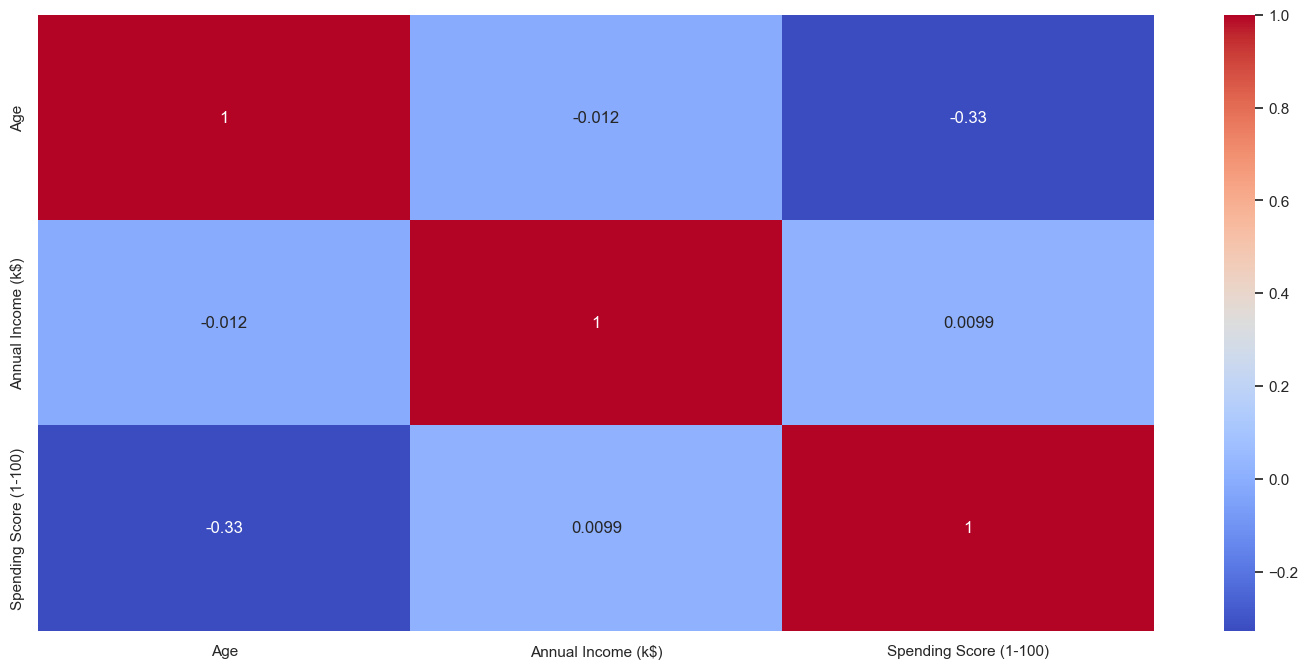

In [46]:
fig, ax = plt.subplots(figsize=(18, 8)) 
sns.heatmap(mall_customers.corr(), annot=True, cmap='coolwarm', ax=ax)

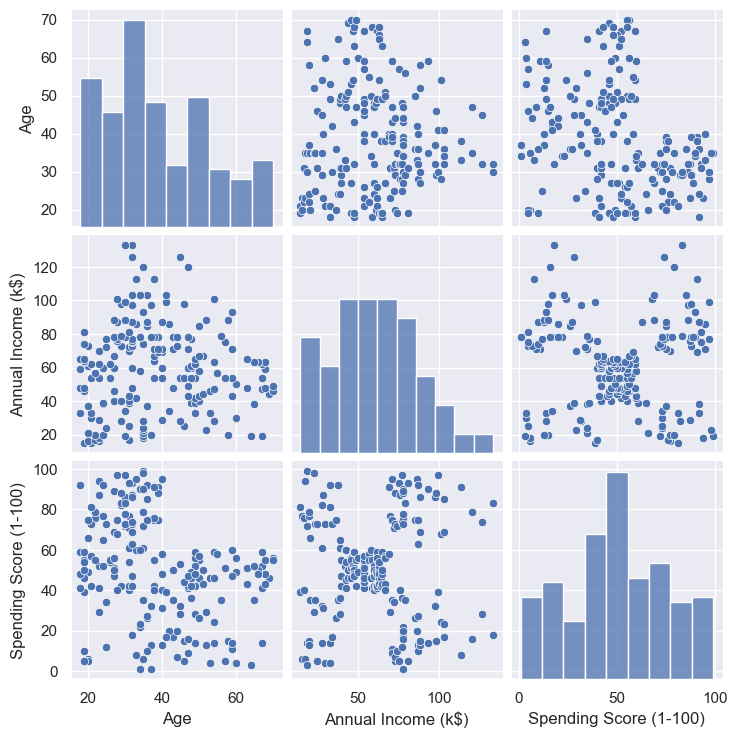

In [47]:
sns.pairplot(mall_customers) 
plt.show()

In [48]:
X = mall_customers.iloc[:,[2,3]]

In [49]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15.0,39
1,15.0,81
2,16.0,6
3,16.0,77
4,17.0,40


In [50]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [51]:
X

array([[-1.74542941, -0.43480148],
       [-1.74542941,  1.19570407],
       [-1.70708307, -1.71591298],
       [-1.70708307,  1.04041783],
       [-1.66873673, -0.39597992],
       [-1.66873673,  1.00159627],
       [-1.6303904 , -1.71591298],
       [-1.6303904 ,  1.70038436],
       [-1.59204406, -1.83237767],
       [-1.59204406,  0.84631002],
       [-1.59204406, -1.4053405 ],
       [-1.59204406,  1.89449216],
       [-1.55369772, -1.36651894],
       [-1.55369772,  1.04041783],
       [-1.55369772, -1.44416206],
       [-1.55369772,  1.11806095],
       [-1.51535138, -0.59008772],
       [-1.51535138,  0.61338066],
       [-1.43865871, -0.82301709],
       [-1.43865871,  1.8556706 ],
       [-1.40031237, -0.59008772],
       [-1.40031237,  0.88513158],
       [-1.36196603, -1.75473454],
       [-1.36196603,  0.88513158],
       [-1.24692702, -1.4053405 ],
       [-1.24692702,  1.23452563],
       [-1.24692702, -0.7065524 ],
       [-1.24692702,  0.41927286],
       [-1.20858069,

In [52]:
wscc = []

In [53]:
for i in range(1,11):
    model_kmean = KMeans(n_clusters=i,init="k-means++",random_state=0)
    model_kmean.fit(X)
    wscc.append(model_kmean.inertia_)

/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/admin/anacond

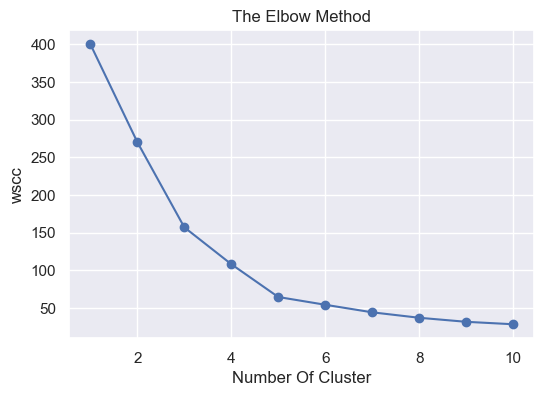

In [54]:
plt.plot(range(1,11),wscc, marker = 'o') 
plt.title("The Elbow Method") 
plt.xlabel("Number Of Cluster") 
plt.ylabel("wscc")
plt.show()

In [55]:
model_kmean = KMeans(n_clusters=5,random_state=0).fit(X)

/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [56]:
y_cluster = model_kmean.predict(X)

In [57]:
y_cluster

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [60]:
from sklearn.metrics import silhouette_score
silhouette_score(X, y_cluster)

0.5555014501078793

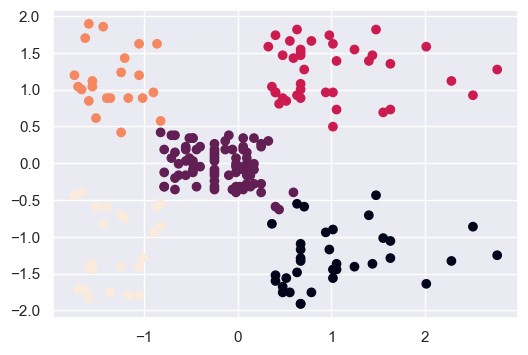

In [61]:
plt.scatter(X[:,0], X[:,1], c=y_cluster)

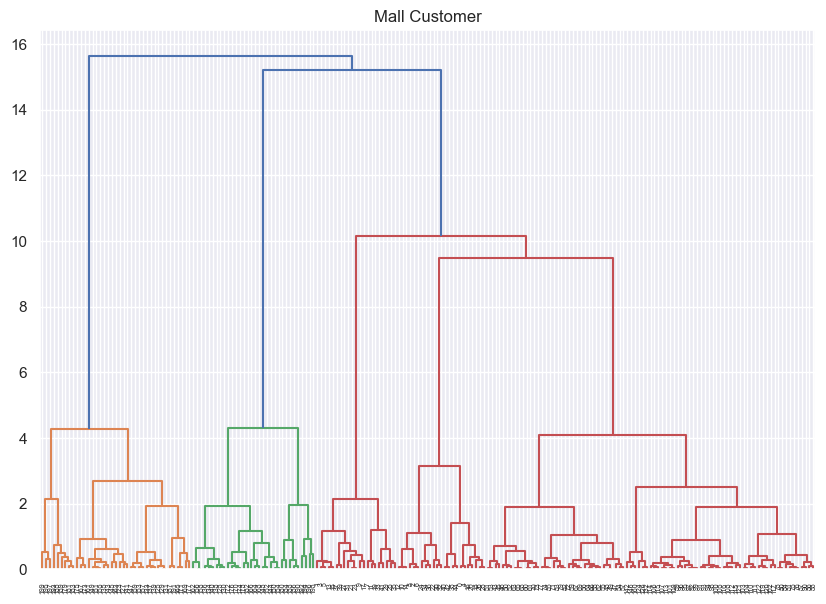

In [63]:
# Another Way To Used Linkage Metrics
from scipy.cluster.hierarchy import dendrogram,linkage 
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.title("Mall Customer")
dend = dendrogram(linkage(X,method="ward"))

<Axes: >

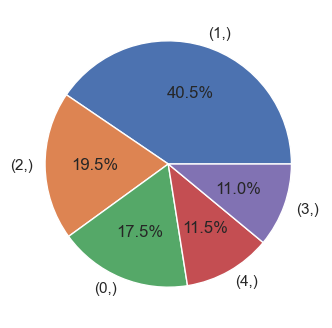

In [64]:
y_cluster = pd.DataFrame(y_cluster) 
y_cluster.value_counts().plot.pie(autopct= '%.1f%%')

In [65]:
model_agg = AgglomerativeClustering(n_clusters=5)

In [66]:
y_pred = model_kmean.predict(X)

In [67]:
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [68]:
silhouette_score(X, y_pred)

0.5555014501078793

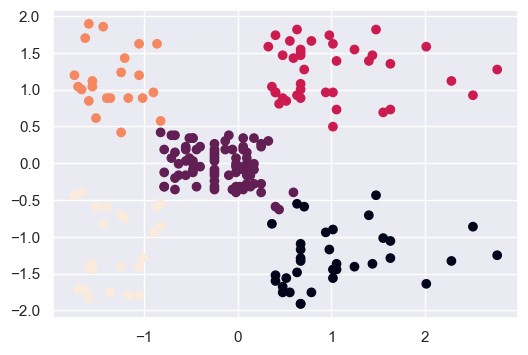

In [69]:
plt.scatter(X[:,0], X[:,1], c=y_pred)

<Axes: >

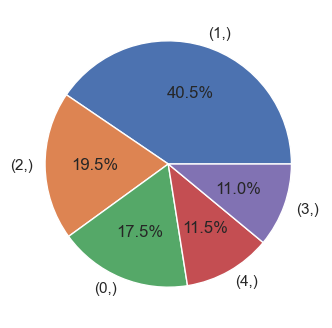

In [70]:
y_pred = pd.DataFrame(y_pred) 
y_pred.value_counts().plot.pie(autopct= '%.1f%%')